In [1]:
from MLSD import *

In [2]:
import scipy.io as sio
import pandas as pd
import platform

growth_filepath = 'Dataset/growth.mat'
growth_data_dict = sio.loadmat(growth_filepath) # this is of type dict

print(growth_data_dict['hgtmmat'].shape)
print(growth_data_dict['hgtfmat'].shape)
print(growth_data_dict['age'].shape)
print()
print(sorted(growth_data_dict.keys()))

ages_arr = growth_data_dict['age']

boys_df = pd.DataFrame(growth_data_dict['hgtmmat'])
boys_df['age'] = ages_arr
boys_df = pd.melt(boys_df, id_vars=['age'])
boys_df.rename(columns={'variable' : 'cohort_id', 'value' : 'height'}, inplace=True)
boys_df['gender'] = 'boy'
#boys_df

girls_df = pd.DataFrame(growth_data_dict['hgtfmat'])
girls_df['age'] = ages_arr
girls_df = pd.melt(girls_df, id_vars=['age'])
girls_df.rename(columns={'variable' : 'cohort_id', 'value' : 'height'}, inplace=True)
girls_df['gender'] = 'girl'
#girls_df

growth_data_df = pd.concat([boys_df, girls_df])

(31, 39)
(31, 54)
(31, 1)

['D2hgtfmat12', 'Dhgtffd', 'Dhgtfmat', 'Dhgtfmeanfd', 'Dhgtfmeanvec', 'Dhgtfregfd', 'Dhgtfregmat', 'Dhgtfvec', 'Lfdobj', 'PGSctr', 'PGSctrmean', 'SSE', 'Wfd', 'Wfd0', 'WfdCR', 'WfdLM', 'WfdPar', 'WfdParLM', 'WfdParf', 'WfdParm', 'Wfdf', 'Wfdm', '__globals__', '__header__', '__version__', 'accelfdCR', 'accelfdLM', 'accelfdUN', 'accelmatCR', 'accelmatLM', 'accelmatUN', 'accelmeanfdLM', 'accffd', 'accfmatfine', 'accfmeanfine', 'accmat', 'accmn', 'accveci', 'adn', 'adnj', 'age', 'agefine', 'agej', 'ageval', 'ans', 'aup', 'aupj', 'basisw', 'beta', 'betaf', 'betam', 'coef', 'coef0', 'df', 'dfi', 'dfsave', 'fid', 'gcv', 'gcvi', 'gcvsave', 'growth', 'hgtbasis', 'hgtbasis12', 'hgtfdPar', 'hgtfdPari', 'hgtfdi', 'hgtfdpar', 'hgtffd', 'hgtffd12', 'hgtffit', 'hgtfhatfd', 'hgtfmat', 'hgtfmatfine', 'hgtfres', 'hgtfresmnsqr', 'hgtfstd', 'hgtfvar', 'hgtmfd', 'hgtmfit', 'hgtmhatfd', 'hgtmmat', 'hgtmres', 'hgtmresmnsqr', 'hgtmstd', 'hgtmvar', 'i', 'icase', 'index', 'indx', 'ind

In [24]:
height = growth_data_df.groupby(['cohort_id','gender'])['height'].apply(list)
age = growth_data_df.groupby(['cohort_id','gender'])['age'].apply(list)
gender_x = growth_data_df.groupby(['cohort_id','gender'])['gender'].apply(list)

In [27]:
gender = []

for i in gender_x:
    gender.append(np.unique(i)[0])

In [4]:
height = SData(x= np.asarray(height), dtype='Series')
age = SData(x= np.asarray(age), dtype='Series')

In [33]:
len(height)

93

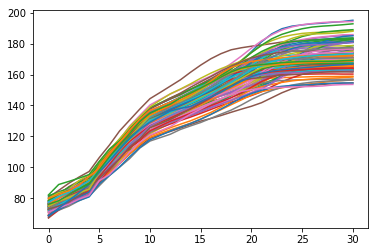

In [12]:
height.plot()

In [13]:
height.extracted_features

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,81.3,195.1,148.987097,38.157650,-0.395776,-1.160091,153.4,3.793333,2.555378,0.4,...,9.7,0.633298,-0.521547,-0.072414,1.874124,-5.3,-1.000000e-01,7.2,1.220537,7.067003
1,76.2,158.9,132.761290,28.020150,-0.766576,-0.867915,142.4,2.756667,2.384349,0.0,...,8.3,0.702714,-0.400481,-0.141379,1.341774,-2.0,-3.000000e-01,6.3,3.702938,15.505676
2,76.2,178.7,135.700000,30.888572,-0.499545,-0.868678,142.2,3.416667,2.074622,1.3,...,9.4,1.380038,0.921149,-0.100000,1.550528,-2.2,-2.000000e-01,7.2,3.437560,14.162635
3,74.6,166.1,134.987097,30.427341,-0.665556,-0.958074,143.4,3.046667,2.150772,-0.1,...,7.2,0.348771,-0.680805,-0.117241,0.989625,-2.6,-2.842171e-14,2.3,-0.065743,0.741203
4,76.8,171.5,132.525806,30.698019,-0.377716,-1.102338,135.8,3.156667,1.872019,0.3,...,7.5,0.601827,-0.378104,-0.093103,1.361017,-2.9,0.000000e+00,5.5,1.862987,7.896002
5,78.2,162.2,137.658065,28.881144,-0.900756,-0.716954,152.3,2.800000,2.872165,-0.2,...,12.1,1.237515,1.530377,-0.113793,1.817676,-5.1,-2.000000e-01,5.8,0.982482,4.494802
6,74.1,181.8,138.906452,34.184848,-0.423467,-1.024701,144.0,3.590000,2.208974,0.2,...,10.5,0.939126,1.265554,-0.141379,1.950865,-4.7,-1.000000e-01,7.8,1.700006,7.898981
7,77.7,167.8,137.258065,30.178338,-0.706357,-0.886170,145.7,3.003333,2.282175,0.0,...,8.3,0.743524,-0.046027,-0.089655,1.137555,-2.2,-1.000000e-01,5.0,2.741236,11.447863
8,74.2,172.5,132.209677,32.965107,-0.394848,-1.140468,137.4,3.276667,2.047711,0.0,...,7.5,0.481266,-0.377866,-0.072414,1.233134,-2.4,-1.000000e-01,5.3,2.497045,10.047253
9,76.0,170.0,136.645161,31.252921,-0.619297,-0.999437,144.0,3.133333,2.276449,0.0,...,8.0,0.581337,-0.520454,-0.137931,1.547504,-6.0,0.000000e+00,4.0,-1.109008,6.069094


In [30]:
from MLSD import *
from sklearn.svm import SVC
height = SData(np.asarray(height), dtype='Series',
                    column = 'HeightCurve')

model = SVC()
model.fit(height.extracted_features, gender)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
ac= activeTrans(ifSData = True)
ac.fit(height)
ac.transform(height)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,81.3,195.1,148.987097,38.157650,-0.395776,-1.160091,153.4,3.793333,2.555378,0.4,...,9.7,0.633298,-0.521547,-0.072414,1.874124,-5.3,-1.000000e-01,7.2,1.220537,7.067003
1,76.2,158.9,132.761290,28.020150,-0.766576,-0.867915,142.4,2.756667,2.384349,0.0,...,8.3,0.702714,-0.400481,-0.141379,1.341774,-2.0,-3.000000e-01,6.3,3.702938,15.505676
2,76.2,178.7,135.700000,30.888572,-0.499545,-0.868678,142.2,3.416667,2.074622,1.3,...,9.4,1.380038,0.921149,-0.100000,1.550528,-2.2,-2.000000e-01,7.2,3.437560,14.162635
3,74.6,166.1,134.987097,30.427341,-0.665556,-0.958074,143.4,3.046667,2.150772,-0.1,...,7.2,0.348771,-0.680805,-0.117241,0.989625,-2.6,-2.842171e-14,2.3,-0.065743,0.741203
4,76.8,171.5,132.525806,30.698019,-0.377716,-1.102338,135.8,3.156667,1.872019,0.3,...,7.5,0.601827,-0.378104,-0.093103,1.361017,-2.9,0.000000e+00,5.5,1.862987,7.896002
5,78.2,162.2,137.658065,28.881144,-0.900756,-0.716954,152.3,2.800000,2.872165,-0.2,...,12.1,1.237515,1.530377,-0.113793,1.817676,-5.1,-2.000000e-01,5.8,0.982482,4.494802
6,74.1,181.8,138.906452,34.184848,-0.423467,-1.024701,144.0,3.590000,2.208974,0.2,...,10.5,0.939126,1.265554,-0.141379,1.950865,-4.7,-1.000000e-01,7.8,1.700006,7.898981
7,77.7,167.8,137.258065,30.178338,-0.706357,-0.886170,145.7,3.003333,2.282175,0.0,...,8.3,0.743524,-0.046027,-0.089655,1.137555,-2.2,-1.000000e-01,5.0,2.741236,11.447863
8,74.2,172.5,132.209677,32.965107,-0.394848,-1.140468,137.4,3.276667,2.047711,0.0,...,7.5,0.481266,-0.377866,-0.072414,1.233134,-2.4,-1.000000e-01,5.3,2.497045,10.047253
9,76.0,170.0,136.645161,31.252921,-0.619297,-0.999437,144.0,3.133333,2.276449,0.0,...,8.0,0.581337,-0.520454,-0.137931,1.547504,-6.0,0.000000e+00,4.0,-1.109008,6.069094


In [14]:
Mydata= SDataFrame(data = [height,age], columns=["height", "age"])

In [9]:
Mydata.extracted_features

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,81.3,195.1,148.987097,38.157650,-0.395776,-1.160091,153.4,3.793333,2.555378,0.4,...,9.7,0.633298,-0.521547,-0.072414,1.874124,-5.3,-1.000000e-01,7.2,1.220537,7.067003
1,76.2,158.9,132.761290,28.020150,-0.766576,-0.867915,142.4,2.756667,2.384349,0.0,...,8.3,0.702714,-0.400481,-0.141379,1.341774,-2.0,-3.000000e-01,6.3,3.702938,15.505676
2,76.2,178.7,135.700000,30.888572,-0.499545,-0.868678,142.2,3.416667,2.074622,1.3,...,9.4,1.380038,0.921149,-0.100000,1.550528,-2.2,-2.000000e-01,7.2,3.437560,14.162635
3,74.6,166.1,134.987097,30.427341,-0.665556,-0.958074,143.4,3.046667,2.150772,-0.1,...,7.2,0.348771,-0.680805,-0.117241,0.989625,-2.6,-2.842171e-14,2.3,-0.065743,0.741203
4,76.8,171.5,132.525806,30.698019,-0.377716,-1.102338,135.8,3.156667,1.872019,0.3,...,7.5,0.601827,-0.378104,-0.093103,1.361017,-2.9,0.000000e+00,5.5,1.862987,7.896002
5,78.2,162.2,137.658065,28.881144,-0.900756,-0.716954,152.3,2.800000,2.872165,-0.2,...,12.1,1.237515,1.530377,-0.113793,1.817676,-5.1,-2.000000e-01,5.8,0.982482,4.494802
6,74.1,181.8,138.906452,34.184848,-0.423467,-1.024701,144.0,3.590000,2.208974,0.2,...,10.5,0.939126,1.265554,-0.141379,1.950865,-4.7,-1.000000e-01,7.8,1.700006,7.898981
7,77.7,167.8,137.258065,30.178338,-0.706357,-0.886170,145.7,3.003333,2.282175,0.0,...,8.3,0.743524,-0.046027,-0.089655,1.137555,-2.2,-1.000000e-01,5.0,2.741236,11.447863
8,74.2,172.5,132.209677,32.965107,-0.394848,-1.140468,137.4,3.276667,2.047711,0.0,...,7.5,0.481266,-0.377866,-0.072414,1.233134,-2.4,-1.000000e-01,5.3,2.497045,10.047253
9,76.0,170.0,136.645161,31.252921,-0.619297,-0.999437,144.0,3.133333,2.276449,0.0,...,8.0,0.581337,-0.520454,-0.137931,1.547504,-6.0,0.000000e+00,4.0,-1.109008,6.069094
